# LAMMPS Tutorials 02 nve. Running your first LAMMPS simulation!

### Author: ABDELLAH TAHIRI 

Please contact me if you have a problem with this tutorial, so I can modify in Github.  I have added FAQs, and will update my versions of LAMMPS in the future to keep the scripts current.

The latest version of this [Jupyter Notebook](http://ipython.org/notebook.html) tutorial is available at https://github.com/athiri78/DM/edit/main/LAMMPS-Tutorials.



***

## Description:
<a id="Sec1"></a>

* The primary goal of this script is to perform energy minimization on a system of two types of atoms, arranged in specific cylindrical regions, and output thermodynamic data during the minimization process.

* System Configuration:
Two types of atoms are created in different regions: one type (type 1) in an outer cylindrical region and the other type (type 2) in an inner cylindrical region. The interaction between atoms is modeled using the Lennard-Jones potential with different parameters for type 1-1 and type 2-2 interactions.


## Step 1: Download an Input File
<a id="Step1"></a>

This input script was run using the Aug 2024 version of LAMMPS. Changes in some commands may require revision of the input script. To get the input file, you have a few options:

*  Copy the text below and paste it into a text file, `Diatomic1.in`. Use the `Paste Special` command with unformatted text into the file. 
*  Or, I added the command `%%writefileDiatomic1.in` to the Jupyter Notebook which should just do everything for you!




In [1]:
%%writefile Diatomic1.in
######################################
#######################################################################
# PART A - ENERGY MINIMIZATION
#####################################################################
# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5
boundary p p p
######################
# 2) System definition

region simulation_box block -20 20 -20 20 -20 20
create_box 2 simulation_box
region region_cylinder_in cylinder z 0 0 10 INF INF side in
region region_cylinder_out cylinder z 0 0 10 INF INF side out
create_atoms 1 random 1000 341341 region_cylinder_out
create_atoms 2 random 150 127569 region_cylinder_in

##########################
# 3) Simulation settings
mass 1 1
mass 2 1
pair_coeff 1 1 1.0 1.0
pair_coeff 2 2 0.5 3.0
# 4) Visualization
thermo 10
thermo_style custom step temp pe ke etotal press
dump mydmp all atom 10 dump.min.lammpstrj
# 5) Run
minimize 1.0e-4 1.0e-6 1000 10000
write_data minimized_coordinate.data
################################################################################


# End of Script

Writing Diatomic1.in


Awesome!  That little script should have written the above text to the file `nve.in`.  To check, let's execute a command on the present directory listing all files that end in `*.in`.

In [4]:
!dir *.in

 Le volume dans le lecteur C n’a pas de nom.
 Le numéro de série du volume est DC02-C1A6

 Répertoire de C:\Users\pc\Desktop\M2A

21/11/2024  10:17             1 774 calc_fcc.in
12/11/2024  14:40             1 565 calc_fcc_ver1.in
09/11/2024  14:10             1 233 calc_fcc_ver2.in
03/12/2024  12:18             1 141 Diatomic.in
03/12/2024  12:22             1 113 Diatomic1.in
12/11/2024  16:49             1 177 lj.in
12/11/2024  17:08               533 ljbarosta.in
12/11/2024  17:19             1 389 ljovito.in
12/11/2024  18:10             1 018 ljrdf.in
12/11/2024  16:59               522 ljthermo.in
25/11/2024  12:17             2 875 minimization.in
25/11/2024  12:45             3 080 minimization1.in
03/12/2024  11:44             1 141 mixed.in
26/11/2024  15:15             3 352 nve.in
26/11/2024  16:50             4 909 nve_npt_nvt.in
23/11/2024  15:26             3 010 nvt.in
              16 fichier(s)           29 832 octets
               0 Rép(s)  164 537 499 648 octets l

***
## Step 2: Running LAMMPS
### Run this using LAMMPS in Jupyter Notebook
We can actually run this from Jupyter Notebook.  Let's try it.

In [8]:
!lmp -in Diatomic1.in  -pk omp 8 -sf omp 

LAMMPS (29 Aug 2024 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\LAMMPS 64-bit 29Aug2024\plugins
set 8 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Created orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
Created 1000 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.002 seconds
Created 150 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Generated 1 of 1 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 2.8
  ghost atom cutoff = 2.8
  binsize = 1.4, bins = 29 29 29
  1 neighbor lists, perpetual/occasion

Sweet!

If you want to view the entire file (opening `log.lammps` in Notepad), then:

In [10]:
!type log.lammps

LAMMPS (29 Aug 2024 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\LAMMPS 64-bit 29Aug2024\plugins
package omp 8
set 8 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
######################################
#######################################################################
# PART A - ENERGY MINIMIZATION
#####################################################################
# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5
boundary p p p
######################
# 2) System definition

region simulation_box block -20 20 -20 20 -20 20
create_box 2 simulation_box
Created orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
region region_cylinder_in cylinder z 0 0 10 INF INF side in
region region_cylinder_out cylinder z 0 0 10 INF INF side out
create_atoms 1 random 1000 341341 region_cylinder_ou

## plot the graph with python code 
To plot the graphs for Kinetic Energy (KE) and Potential Energy (PE) as a function of the simulation steps with two different colors (e.g., red and blue), you can use Python and Matplotlib.

In [28]:
# Read LAMMPS log file and extract thermo data

input_log_file = "log.lammps"  # Replace with the actual log file name
output_data_file = "file.data"  # The output data file to be created

# Columns to extract from the log file
columns = ["Step", "pe", "KE", "ETotal", "Temp"]

# Initialize storage for extracted data
data = []

with open(input_log_file, "r") as log:
    capture = False
    for line in log:
        # Detect start of thermo output (header)
        if "Step" in line and "Temp" in line:
            capture = True
            continue
        
        # Stop capturing after thermo ends
        if capture and line.strip() == "":
            capture = False
        
        # Capture thermo data lines
        if capture:
            parts = line.split()
            try:
                # Extract relevant numeric values
                step = int(parts[0])
                pe = float(parts[1])
                ke = float(parts[2])
                etotal = float(parts[3])
                temp = float(parts[4])
                data.append([step, pe, ke, etotal, temp])
            except ValueError:
                # Ignore non-numeric lines
                continue

# Save extracted data to file.data
with open(output_data_file, "w") as output:
    # Write header
    output.write("# Step PE KE ETotal Temp\n")
    # Write data rows
    for row in data:
        output.write(" ".join(map(str, row)) + "\n")

print(f"Thermo data successfully written to {output_data_file}")


Thermo data successfully written to file.data


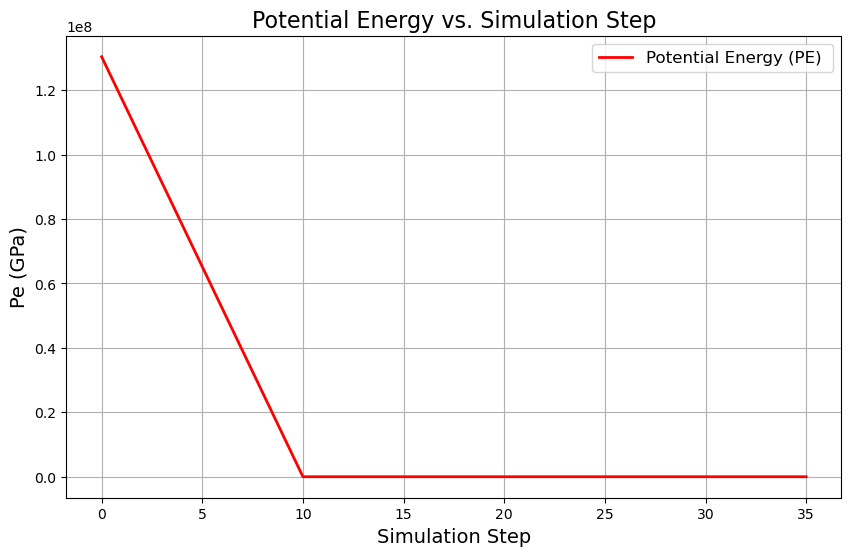

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file.data
input_file = "file.data"  # Replace with the file containing the data
data = np.loadtxt(input_file, comments="#")

# Extract relevant columns: Step, KE, PE
steps = data[:, 0]  # Column 0: Steps
#ke = data[:, 2]     # Column 2: Kinetic Energy (KE)
PE = data[:, 1]     # Column 1: Potential Energy (PE)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot KE with red line
plt.plot(steps, Temp, color="red", label="Potential Energy (PE) ", linewidth=2)

# Plot PE with blue line
#plt.plot(steps, pe, color="blue", label="Potential Energy (PE)", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Simulation Step", fontsize=14)
plt.ylabel("Pe (GPa)", fontsize=14)
plt.title("Potential Energy vs. Simulation Step", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Save the plot to a file (optional)
#plt.savefig("energy_plot.png", dpi=300)

# Display the plot
plt.show()


In [18]:
## plot the graph with python code 



***
## FAQs 
<br>
<div class="alert alert-danger">



1- What would happen if you change the radius of the cylindrical regions (region_cylinder_in and region_cylinder_out) in the simulation? How could this impact the density and arrangement of atoms, and how could you visualize these changes using OVITO?

2- How can you use OVITO software to visualize the trajectory of atoms , and what visualization techniques (e.g., atom color coding, radial distribution function)?





***
## Tutorial Links

[Click here to open the next tutorial](LAMMPS-Tutorials-02.ipynb)